# Proyecto: EL índice de Marginalización de México

Por **José Alberto Leyva Contreras**

In [1]:
# Primero importaremos las librerías que se usan para análisis de datos y graficación

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Descargar y leer la base de datos

Para empezar, vamos a importar los datos que analizaremos el Excel descargado. Los datos se encuentran en la pestaña *IMM 2020*.

Al ser un archivo en Excel (formato .xls), usaremos el método de pandas `pd.read_excel()`



In [2]:
df = pd.read_excel('./IMM_2020.xls', sheet_name='IMM_2020')

Si vemos por encimita el dataframe generado podemos ver los siguientes datos

In [3]:
df.head(10)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
5,1,Aguascalientes,1006,Pabellón de Arteaga,47646,2.732339,25.724280,0.541338,0.425487,1.044760,0.705635,19.075954,32.764555,64.335011,58.624768,Muy bajo,0.917982
6,1,Aguascalientes,1007,Rincón de Romos,57369,3.445917,27.094343,0.965870,0.501341,1.027223,1.302663,20.975502,44.285241,76.643972,57.646671,Muy bajo,0.902667
7,1,Aguascalientes,1008,San José de Gracia,9552,2.439773,28.419940,2.107139,0.922529,1.708775,0.859629,21.572750,41.300251,75.410936,57.527531,Muy bajo,0.900801
8,1,Aguascalientes,1009,Tepezalá,22485,4.235219,35.086278,1.385042,0.585292,1.085694,1.429720,22.985739,76.762286,76.943557,56.604314,Muy bajo,0.886345
9,1,Aguascalientes,1010,El Llano,20853,3.898421,34.757713,2.321131,1.030523,1.781333,1.452547,21.816786,69.754951,76.336092,56.555794,Muy bajo,0.885585


Si bien, vemos que hay varias columnas con -aparentemente- todos los valores son no-nulos, aún no sabemos a qué se refiere cada columna en el Dataframe. Las columnas son acrónimos de los valores que representan.

Ante esto, inspeccionando el archivo Excel, observamos que existe una pestaña llamada como *Diccionario*. Dicha pestaña contiene en sus primeras dos filas valores que no necesitamos, por lo que con el parametro `header=2` decimos que vaya a la tercera fila (recordemos que Python es 0-index), y con  `index_col=0` indicamos que la primera columna sea el índice (para que así no se generen índice numéricos automáticamente) y con `nrows=17` agarramos las primeras 17 filas (omitiendo la fuente).



In [4]:
df_dict = pd.read_excel(
      "./IMM_2020.xls",
      sheet_name="Diccionario",
      header=2, 
      index_col=0,
      nrows=17
      )


In [5]:
df_dict.style.set_properties(subset=['Descripción'], **{'width': '550px'})

,Descripción
Variable,
CVE_ENT,Clave de entidad federativa
NOM_ENT,Nombre de entidad federativa
CVE_MUN,Clave del municipio
NOM_MUN,Nombre del municipio
POB_TOT,Población total
ANALF,Porcentaje de población analfabeta de 15 años o más
SBASC,Porcentaje de población de 15 años o más sin educación básica
OVSDE,Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado
OVSEE,Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica


## Descripción del Dataframe (análisis exploratorio de datos rápido)

Con el método `.info()` podemos ver el tipo de dato como identifico a la columna la libería de Pandas, así como conocer valores no-nulos.

Por lo tanto:



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CVE_ENT   2469 non-null   int64  
 1   NOM_ENT   2469 non-null   object 
 2   CVE_MUN   2469 non-null   int64  
 3   NOM_MUN   2469 non-null   object 
 4   POB_TOT   2469 non-null   int64  
 5   ANALF     2469 non-null   float64
 6   SBASC     2469 non-null   float64
 7   OVSDE     2469 non-null   float64
 8   OVSEE     2469 non-null   float64
 9   OVSAE     2469 non-null   float64
 10  OVPT      2469 non-null   float64
 11  VHAC      2469 non-null   float64
 12  PL.5000   2469 non-null   float64
 13  PO2SM     2469 non-null   float64
 14  IM_2020   2469 non-null   float64
 15  GM_2020   2469 non-null   object 
 16  IMN_2020  2469 non-null   float64
dtypes: float64(11), int64(3), object(3)
memory usage: 328.0+ KB


Observamos que:
1. Existen 2469 registros en la tabla
2. Vemos que tenemos 17 características
3. Afortunadamente, no hay valores Nulos
4. La mayoría de las características son valores numéricos, excepto por el Nombre de la Entidad, el Nombre del Municipio y el grado de marginación


Con el método `.describe()` podemos ver las gráficas descriptivas y medidas de tendencia central.

Por lo tanto:



In [7]:
pd.options.display.float_format = "{:.2f}".format
df.describe()


,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00,2469.00
mean,19.22,19324.16,51038.49,10.16,45.85,3.16,1.50,6.12,7.99,26.57,69.90,82.14,53.96,0.84
std,7.37,7382.89,146990.73,7.63,13.98,5.29,2.77,9.25,8.97,10.59,35.27,11.83,3.90,0.06
min,1.00,1001.00,81.00,0.35,5.54,0.00,0.00,0.00,0.00,3.95,0.00,28.45,21.41,0.34
25%,14.00,14079.00,4489.00,4.43,35.74,0.65,0.37,0.88,1.65,18.73,40.13,74.62,51.84,0.81
50%,20.00,20226.00,13552.00,8.20,46.34,1.43,0.83,2.45,4.71,25.00,100.00,84.64,54.42,0.85
75%,24.00,24027.00,35284.00,13.79,55.86,3.34,1.68,7.29,11.03,32.82,100.00,91.62,56.70,0.89
max,32.00,32058.00,1922523.00,53.07,88.33,64.45,53.07,81.79,68.15,69.56,100.00,100.00,62.40,0.98


Ante esto, podemos ver que:

1. En promedio, el 10% de la población mayor a 15 años es analfabeta.
2.Existe un municipio donde el 53% (más de la mitad) de la población mayor a 15 años es analfabeta.
3. En promedio, casi la mitad (45%) de la población de 15 años o más no cuenta con educación básica.
4. Existe un municipio donde el 90% de la población mayor a 15 años está sin educación básica (lo cual es demasidado).
5. Existe un municipio donde el 64% de la población no cuenta con drenaje ni escusado.
6. En promedio, el 82% de población ocupada por municipio cuenta con ingresos de hasta 2 salarios mínimo, y existe un municipio donde todos (100%) cuentan sólo con ese salario.
7. En promedio, el 26% de las viviendas se encuentran en hacinamiento (no hay espacio para albergar a todos los que viven ahí) :(

  

## Gráfica de Porcentajes por Grado de Marginación

Ahora realizaremos una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación

In [8]:
# Primero veamos las columnas que necesitamos
df[['IMN_2020','GM_2020','NOM_MUN']]

,IMN_2020,GM_2020,NOM_MUN
0,0.94,Muy bajo,Aguascalientes
1,0.89,Muy bajo,Asientos
2,0.89,Muy bajo,Calvillo
3,0.89,Muy bajo,Cosío
4,0.92,Muy bajo,Jesús María
...,...,...,...
2464,0.86,Bajo,Villa Hidalgo
2465,0.89,Muy bajo,Villanueva
2466,0.94,Muy bajo,Zacatecas
2467,0.89,Muy bajo,Trancoso


In [9]:
# Creamos un nuevo df agrupado de menor a mayor, dependidendo del nombre del municipio
df_grouped = df.groupby(['NOM_ENT','GM_2020'])['NOM_MUN'].count()

df_grouped

NOM_ENT              GM_2020 
Aguascalientes       Muy bajo    11
Baja California      Medio        1
                     Muy bajo     5
Baja California Sur  Muy bajo     5
Campeche             Alto         2
                                 ..
Yucatán              Muy bajo     7
Zacatecas            Alto         2
                     Bajo        28
                     Medio        5
                     Muy bajo    23
Name: NOM_MUN, Length: 123, dtype: int64

In [10]:
# Ahora convertiremos los valores de cantidad en porcentajes dependiendo
# del estado
num_munic = df.groupby(["NOM_ENT"]).count()["CVE_ENT"].values

df_grouped_2 = (df_grouped.groupby(
    level=0, group_keys=False).apply(lambda x:100 * x / float(x.sum())).to_frame()
    .reset_index()
)
df_grouped_2

,NOM_ENT,GM_2020,NOM_MUN
0,Aguascalientes,Muy bajo,100.00
1,Baja California,Medio,16.67
2,Baja California,Muy bajo,83.33
3,Baja California Sur,Muy bajo,100.00
4,Campeche,Alto,16.67
...,...,...,...
118,Yucatán,Muy bajo,6.60
119,Zacatecas,Alto,3.45
120,Zacatecas,Bajo,48.28
121,Zacatecas,Medio,8.62


In [11]:
# Renombramos columnas para mayor legibilidad
df_grouped_2 = df_grouped_2.rename(columns={'NOM_ENT': "Estado", "NOM_MUN": "Porcentaje", "GM_2020": "Grado_Marginacion"})
df_grouped_2

,Estado,Grado_Marginacion,Porcentaje
0,Aguascalientes,Muy bajo,100.00
1,Baja California,Medio,16.67
2,Baja California,Muy bajo,83.33
3,Baja California Sur,Muy bajo,100.00
4,Campeche,Alto,16.67
...,...,...,...
118,Yucatán,Muy bajo,6.60
119,Zacatecas,Alto,3.45
120,Zacatecas,Bajo,48.28
121,Zacatecas,Medio,8.62


Teniendo ya la estructura de la tabla que queremos graficar, vayamos a crearla

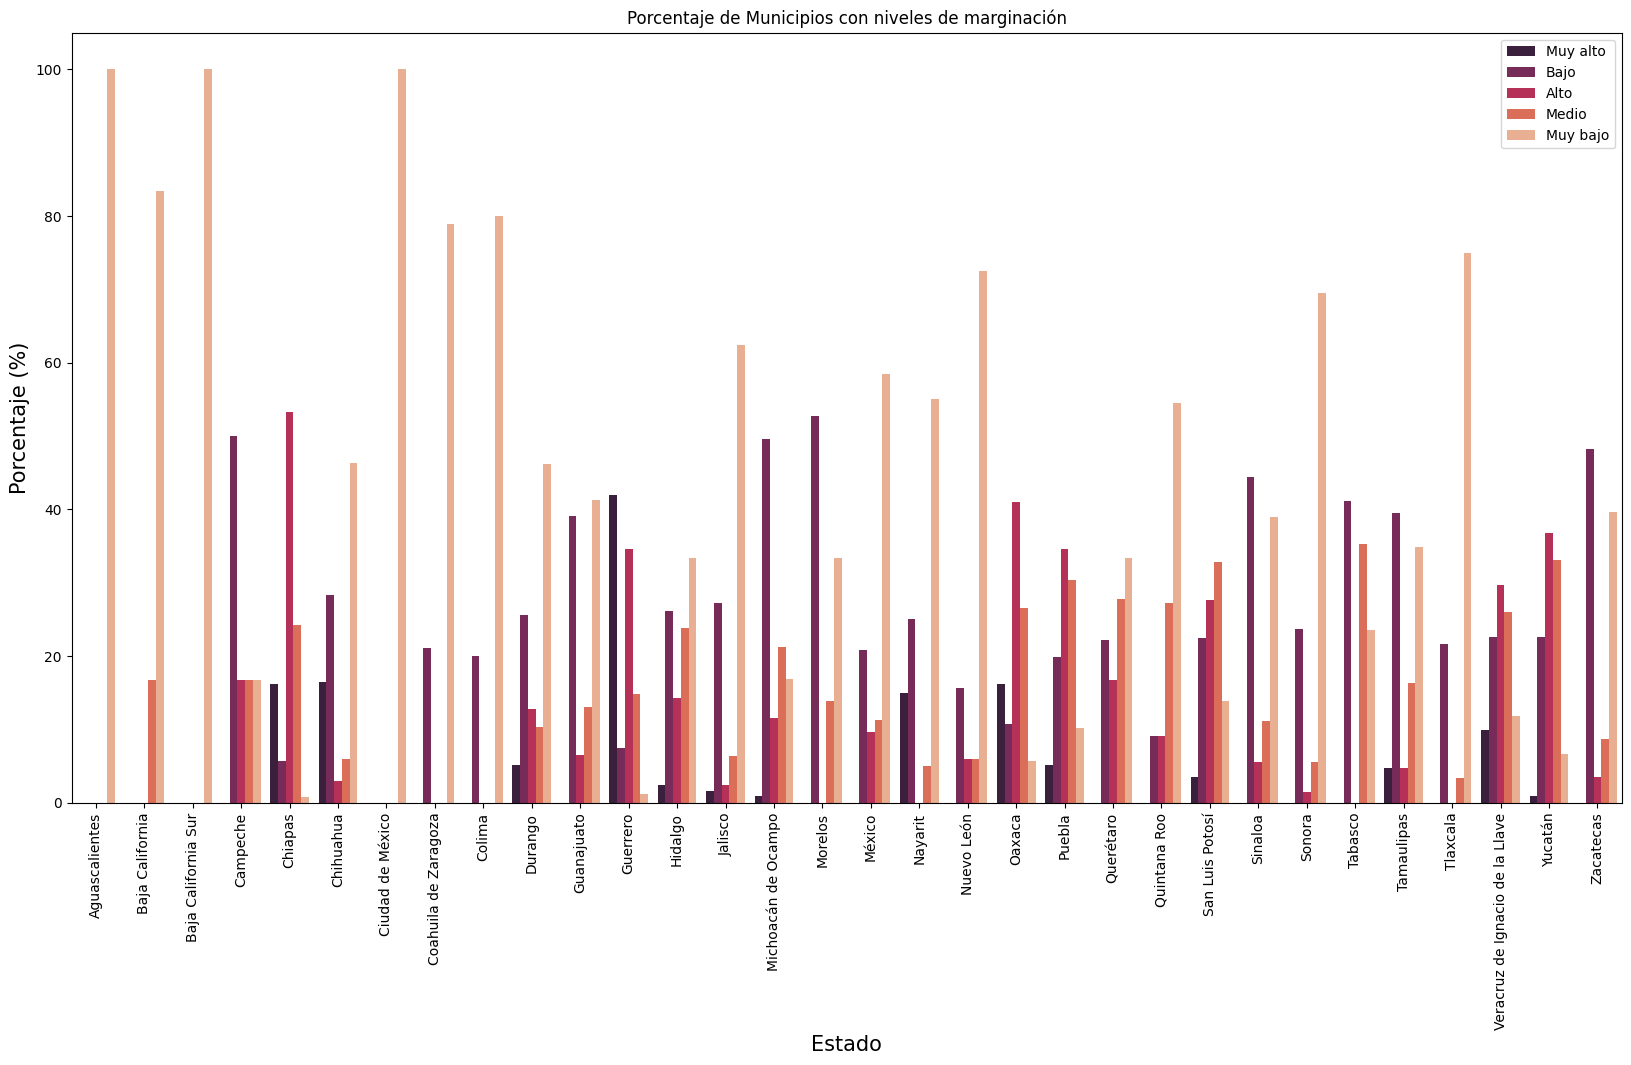

In [ ]:
# Primero declaremos algunas variables para las etiquetas
estados = df_grouped_2['Estado'].unique()
niveles_marginacion = df_grouped_2['Grado_Marginacion'].unique()

# Creamos el lienzo
fig, ax = plt.subplots()
g = sns.barplot(
    x = 'Estado', 
    y = 'Porcentaje',
    hue = 'Grado_Marginacion',
    data = df_grouped_2,
    hue_order = niveles_marginacion[::-1],
    palette='rocket',
    ax = ax)

# Configuramos el grafico
fig.set_size_inches(20,10)
ax.set_xticks(range(len(estados)))
ax.set_xlabel("Estado", fontsize=15)
ax.set_ylabel("Porcentaje (%)", fontsize=15)
ax.set_xticklabels(estados, rotation=90, fontsize=10)
ax.set_title('Porcentaje de Municipios con niveles de marginación')
ax.legend()

#Guaramos la figura 
plt.savefig("porcentaje_municipios_por_nivel_marginacion.png")

plt.show()

# Gráfica de Porcentaje de Población, respecto a la Población Total de Estado

Ahora realizaremos una gráfica que muestre el porcentaje de la población, respecto a la **población total** de cada estado, con índices de marginación.

Para esto, agruparemos por estado y grado de marginación, y después vamos a realizar la suma total por cada estado.

In [ ]:
# Primero veremos las columnas con las que vamos a trabajar
df[['NOM_ENT', 'GM_2020', 'POB_TOT']]

In [ ]:
# Agrupamos por entidad y grado de marginación, pero ahora en vez de un count() realizamos
# un sum() sobre la poblacion total (POB_TOT)

df_grouped_pob = df.groupby(['NOM_ENT','GM_2020'])['POB_TOT'].sum()

df_grouped_pob

In [ ]:
# Ahora convertiremos los valores de cantidad en porcentajes dependiendo
# del estado
num_munic = df.groupby(["NOM_ENT"]).count()["CVE_ENT"].values

df_grouped_pob2 = (df_grouped_pob.groupby(
    level=0, group_keys=False).apply(lambda x:100 * x / float(x.sum())).to_frame()
    .reset_index()
)
df_grouped_pob2

In [ ]:
# Renombramos columnas para mayor legibilidad
df_grouped_pob2 = df_grouped_pob2.rename(columns={'NOM_ENT': "Estado", "POB_TOT": "Porcentaje_Pob", "GM_2020": "Grado_Marginacion"})
df_grouped_pob2

Teniendo ya la estructura del dataset, vamos a graficar los datos

In [ ]:
# Primero declaremos algunas variables para las etiquetas
estados = df_grouped_pob2['Estado'].unique()
niveles_marginacion = df_grouped_pob2['Grado_Marginacion'].unique()

# Creamos el lienzo
fig, ax = plt.subplots()
g = sns.barplot(
    x = 'Estado', 
    y = 'Porcentaje_Pob',
    hue = 'Grado_Marginacion',
    data = df_grouped_pob2,
    hue_order = niveles_marginacion,
    palette='crest',
    ax = ax)

# Configuramos el grafico
fig.set_size_inches(20,10)
ax.set_xticks(range(len(estados)))
ax.set_xlabel("Estado", fontsize=15)
ax.set_ylabel("Porcentaje (%)", fontsize=15)
ax.set_xticklabels(estados, rotation=90, fontsize=10)
ax.set_title('Porcentaje de Población por Entidad con niveles de marginación')
ax.legend()

#Guaramos la figura 
plt.savefig("porcentaje_poblacion_por_nivel_marginacion.png")

plt.show()

En principio, parecen iguales, pero si vemos detalladamente vemos algunas diferencias como que se aprecia que hay ciertos estados con bajo nivel de marginación si nos vamos a población, pero si nos vamos a municipios, tienen niveles de marginación alta (como Morelos, Sinaloa o Zacatecas).

En Chihuahua, si nos vamos por municipio, la mitad tienen baja marginación, pero en proporción con la población, es un cantidad de personas muy altas las que viven de esa manera.

Pueden existir varios estados donde se concentra muchas personas con relativamente baja marginación, pero que contenga municipios con alta migración.


## Gráfica de relación entre Alfabetismo respecto a poblaciones de localidades de menos de 5 mil habitantes

Para realizar esto, haremos un diagrama de dispersión

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(x='PL.5000', y='ANALF', data=df)

ax.set_ylabel(df_dict.loc['ANALF'].item())
ax.set_xlabel(df_dict.loc['PL.5000'].item())


plt.show()

## Relación e identificación de variables de correlación

¿Existe una relación? ¿Cómo podrías analizar con que variable tiene más corelación el porcentaje de analfabetismo en personas mayores de 15 años?


Se puede apreciar que la relación entre las dos variables es débil. Los puntos se encuentran bastante dispersos. Los puntos sobre el lado derecho de la gráfica indican que en municipios poco poblados, el porcentaje de menos de 5000 habitantes es el 100 %

Para analizar las variables con las se correlacionan, podemos utilizar el método `corr()`


In [ ]:
# Eliminamos las dos primeras columnas, ya que no son relevantes ni numéricas
correlation = df.drop(['CVE_ENT', 'CVE_MUN'], axis='columns').corr(numeric_only=True) 

correlation

Si nos fijamos en la fila (o columna) *ANALF*, observamos que:

- A mayor analfabetización, mayor personas sin educación básica.
- También se relaciona con las viviendas particulares con piso de tierra de manera positiva.
- Tiene una correlación positiva con el porcentaje de vivientas particulares con hacinamiento.
- Tiene una corelación negativa con el Indice de Marginalización y el Índice de Marginalización Normalizado.

## Generar nuevos indicadores

¿Se pueden gemerar nuevos indicadores a partir de los anteriores?

In [ ]:
# Veamos el dataframe original nuevamente
df

In [ ]:
df.describe()

Podemos crear nuevas columnas a partir de otras, como encontrar algunas métricas de acuerdo a la población total o de acuerdo a medidas de tendencia central, como por ejemplo:

In [ ]:
# Obtener la media para las columnas ANALF, SBASC, VHAC, PO2SM

dict_mean = {}
for column in ['ANALF', 'SBASC', 'OVSDE', 'VHAC', 'PO2SM','PL.5000']:
  dict_mean[column+"_MEAN"] = df[column].mean()

dict_mean

Podemos crear un nuevo df con los datos de acuerdo a poblaciones, multiplicando los valores y dividiendolos para sacar el valor relativo

In [ ]:
new_df = pd.DataFrame()

new_df['ESTADO'] = df['NOM_ENT'].unique()

new_df

In [ ]:
for column in ['ANALF', 'SBASC', 'OVSDE', 'VHAC', 'PO2SM','PL.5000']:
  new_df['POB_' + column] = df['POB_TOT'] * df[column] / 100

new_df.head()

Incluso podemos hacer varias cosas, como sacar los estados con porcentajes mas marginados y crear otra columna para eso. En general, todo esto se pued ir desarrollando más y mas.

## Generación de archivo parquet

Para concluir, guardemos nuestro nuevo dataframe en un archivo parquet

In [ ]:
new_df.to_parquet("new_pob_df.parquet")